<h1 style="font-size: 2em;">En Plaza, Cerveza, Pizza y Cebolla</h1> 

<hr>

<br>

### ¿Como se obtuvieron y se estructuraron los datos para cada producto?

Para obtener datos de interés sobre cada producto, se visitó personalmente el establecimiento donde dicho producto podía ser encontrado, y se tomaron las métricas necesarias para desarrollar los análisis que podían resultar interesantes. Desde el precio medio de la pizza en Plaza hasta si importa o no que varios establecimientos estén cercanos entre sí para conformar un precio, son algunas de las preguntas que podrán ser contestadas tomando como base los datos encontrados.

#### -Cerveza:

En cuanto a la cerveza, los datos analizados fueron: marca, precio, tipo de envase, color del envase, contenido, grado de alcohol, país de origen y ubicación de cada instancia del líquido. Haciendo uso de dichos datos para cada cerveza, se pueden establecer relaciones que sean un indicador de la variedad, costo y adaptabilidad del precio según el lugar donde está situado el establecimiento y otras variables. A partir de dichas preguntas, se pueden sacar conclusiones respecto a la capacidad del país para competir con el producto importado.

#### -Pizza:

Sobre la pizza se tomaron los datos: tamaño, agregados, precios de los agregados, tipos especiales de pizza y cercanía a lugares de interés y de establecimientos que vendían pizza entre sí. A partir de estos datos, es posible conocer los costos que tiene este producto y la capacidad de compra de la moneda nacional para conformar un almuerzo que, a priori, no parece algo que debería ser preocupante, por lo que se pueden validar o desmentir hipótesis sobre qué tan impactante puede resultar para la economía de un individuo consumir una pizza con el agregado de su preferencia.

#### -Cebolla:

Sobre la cebolla, esta fue encontrada únicamente en agros en el municipio, y era vendida únicamente por libra. Sin embargo, el margen de precio del producto es muy amplio y como curiosidad, es más caro obtener una libra de cebolla que una pizza. Esto será argumentado y analizado próximamente haciendo uso de los precios y los tipos de cebolla que se venden en Plaza de la Revolución.


<h1 style="font-size: 1.5em;">Analizando la Cerveza</h1>


<hr> 

>_"La cerveza, que tomada con exceso mata, como mata el exceso de comida, 
>reune todas las condiciones estimulantes que hacen deseables y gustosas las bebidas alcohólicas, 
>y no tiene ninguna de sus condiciones destructoras.”_
>
                                        >Jose Marti, La Opinión Nacional, 23 de febrero de 1882.

<br>

Resultan interesantes las características que otorga El Apóstol a la cerveza, bebida que arribó a nuestro país por primera vez en el siglo XVII, de contrabando desde Jamaica. Fue en 1772 que la cerveza entra a Cuba de manera legal y, naturalmente, como resultado del gusto por el brebaje, el emprendimiento cubano comenzó a valorar la opción de crear una cerveza nacional. Así, en 1841, Juan Manuel Asbert y Calixto García comenzaron los primeros experimentos para producir la bebida en Cuba reemplazando la cebada por la caña, lo cual fue un rotundo fracaso y dio paso a que los primeros compases de la bebida en la colonia estuvieran marcados por un dominio del producto originario de Inglaterra, que era servido en tabernas y establecimientos similares, e hizo del embotellamiento un lucrativo negocio alternativo. De las alrededor de 130 marcas que era posible consumir, la Tennent Lager gozaba de mayor popularidad. Sin embargo, las barreras arancelarias impuestas por la metrópoli no demoraron en hacer que producir la cerveza en el país fuera más factible que solamente embotellarla y en 1888 se instaló en Puentes Grandes la primera productora de cerveza cubana: "La Tropical".

A medida que se pulía la fórmula cervecera antillana, otras marcas fueron apareciendo e incluso trascendieron más allá del territorio nacional, ganando premios como el Diploma y Gran Premio en la Exposición Internacional del Progreso, celebrado en París en 1912. Era tanta la calidad de la que presumía la cerveza cubana, que muchos nacionales las preferían sobre las ofertas extranjeras. Entre las marcas más populares en nuestro país han estado por muchos años la Cristal, la Bucanero, la Tinima, la Mayabe y la Cacique.

A partir de este breve recorrido histórico es posible realizar un análisis de la situación de la cerveza en nuestro país, bebida que, como ya se ha comentado, ha visto su auge y desarrollo verse obstaculizado o incentivado a partir de medidas de índole económico pues, a nivel social, aún goza de una popularidad extrema. A continuación, se discutirán los resultados obtenidos a partir de una muestra de establecimientos donde se vende esta bebida en el municipio Plaza de la Revolución en La Habana.


#### ¿Que marcas de cerveza abundan mas en el mercado actual?



Text(1.031, 0.7, 'Media de Apariciones por Cerveza: \n2.56')

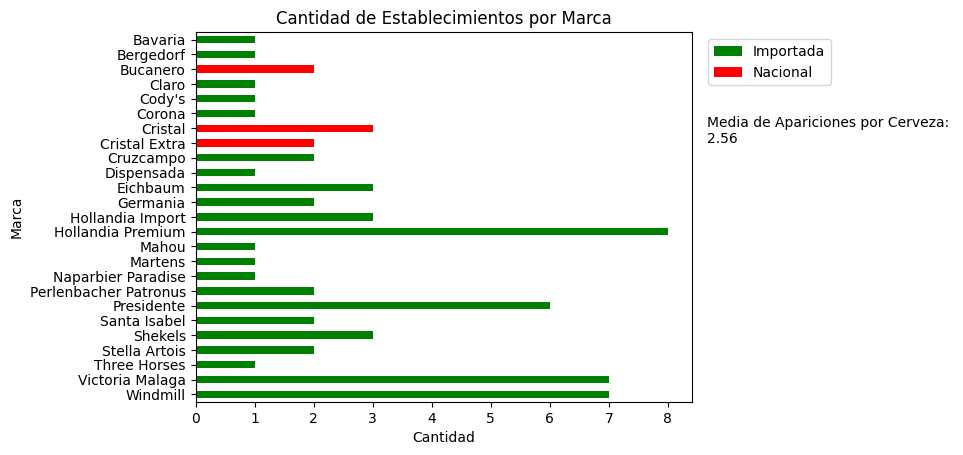

In [2]:
import pandas as pd
import os
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import numpy
from IPython.display import display, Markdown
import numpy as np
import scipy
from matplotlib.colors import ListedColormap
import plotly.express as px
import squarify
import itertools
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)


def obtener_ruta_json(nombre_archivo): # Definimos la función "obtener_ruta_json" que recibe un argumento "nombre_archivo"

    ruta_actual = os.getcwd() # Obtenemos la ruta actual del directorio donde se encuentra el script en ejecución

    for ruta, directorios, archivos in os.walk(ruta_actual): # Iteramos sobre los directorios y archivos dentro de la ruta actual
        for archivo in archivos: # Iteramos sobre los archivos dentro de la ruta actual
            if archivo == nombre_archivo and archivo.endswith('.json'): # Si el archivo coincide con el nombre buscado y su extensión es .json
                return os.path.abspath(os.path.join(ruta, archivo)) # Devolvemos la ruta absoluta del archivo encontrado

    return None # Si no se encontró ningún archivo que coincida con el nombre y extensión buscados, devolvemos "None"
    
with open(obtener_ruta_json('Productos.json'), 'r', encoding='utf-8') as f:
    data = json.load(f) # Cargamos el contenido del archivo JSON en la variable "data"

# Normalizamos los datos de la clave "cerveza" dentro de la variable "data" utilizando la función "json_normalize" de pandas, y almacenamos el resultado en la variable "df"
df = pd.json_normalize(data, 'cerveza')

# Creamos una nueva columna "es_de_cuba" en el DataFrame "df", que es True si la columna "pais" es igual a 'Cuba', y False en caso contrario
df['es_de_cuba'] = df['pais'].apply(lambda x: x == 'Cuba')

# Agrupamos el DataFrame "df" por las columnas "marca" y "es_de_cuba", y contamos la cantidad de elementos en cada grupo utilizando la función "size"
counts = df.groupby(['marca', 'es_de_cuba']).size()
    
media = np.mean(counts).round(2)


# Creamos un gráfico de barras horizontal apiladas utilizando el método "plot" del objeto "counts" con el parámetro "kind" igual a 'barh' 
# para indicar que queremos un gráfico de barras horizontal, 
# y el parámetro "stacked" igual a "True" para indicar que queremos barras apiladas
# También especificamos los colores para cada uno de los valores de la columna "es_de_cuba" utilizando el parámetro "color"
ax = counts.unstack().plot(kind='barh', stacked=True, color=['green', 'red'])

ax.set_title('Cantidad de Establecimientos por Marca')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Marca')
ax.legend(['Importada', 'Nacional'], bbox_to_anchor=(1.02, 1), loc='upper left')
ax.invert_yaxis()
ax.text(1.031, 0.7, f'Media de Apariciones por Cerveza: \n{media}', transform=ax.transAxes)




Sobre las demás, resalta la cerveza "Hollandia Premium", originaria de Países Bajos, que se encontraba en 8 de los establecimientos analizados. Con mayor frecuencia, también se encontraron en un segundo puesto la "Victoria Málaga" y la "Windmill", seguidas de la Presidente. 

Como es posible observar, la cantidad de establecimientos en los que están presentes las bebidas nacionales no es positiva respecto a las bebidas importadas. La mayor representación se encontró en la cerveza Cristal, que fue localizada en 3 establecimientos del municipio capitalino. Esto la sitúa por encima de la media respecto a la disponibilidad del resto de marcas, la cual es de 2,56. Sin embargo, un total de 25 marcas distintas que se encontraron, solamente tres eran cubanas, lo que representa el doce por ciento del total de marcas disponibles en las ubicaciones que se analizaron, que fueron 32. De estos establecimientos, solamente en tres se encontraban disponibles marcas nacionales, lo que representa el 9,4 por ciento del total de establecimientos.

Text(0.9, -1.0, 'Total: 25')

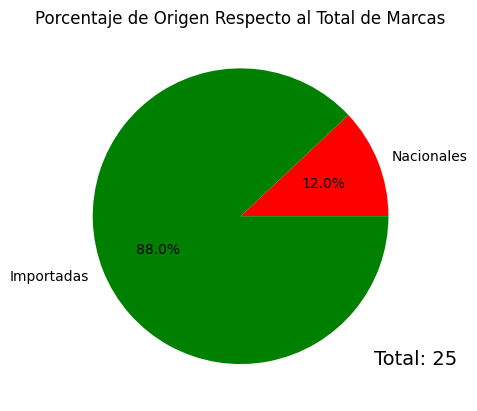

In [25]:
df_unique = df.drop_duplicates(subset='marca')

counts = df_unique['pais'].value_counts()
cuba_count = counts.get('Cuba', 0)

total_count = len(df_unique)
cuba_percent = cuba_count / total_count * 100
importadas_percent = 100 - cuba_percent

data = {'Nacionales': cuba_percent, 'Importadas': importadas_percent}

fig, ax = plt.subplots()
colors = ['Red', 'green']
ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', colors=colors)
ax.set_title('Porcentaje de Origen Respecto al Total de Marcas')

total = f'Total: {total_count}'
ax.text(0.9, -1.0, total, fontsize=14, color='black')


Text(0.9, -1.0, 'Total: 32')

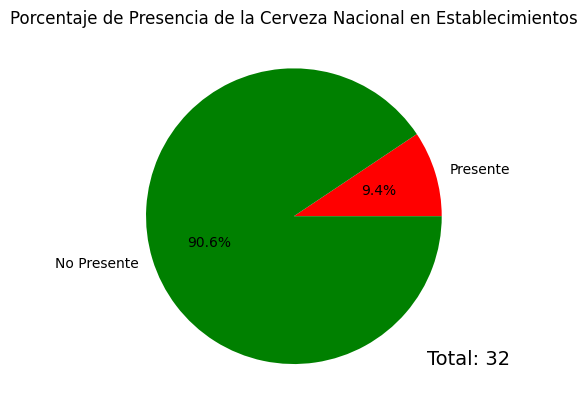

In [26]:
temp_list = []

for indice,fila in df.iterrows():
    temp_list.append(fila['ubicacion'])
    
ubicaciones_diferentes = []
for elemento in temp_list:
    if elemento not in ubicaciones_diferentes:
        ubicaciones_diferentes.append(elemento)
            

ubicaciones_nacionales = []

for indice,fila in df.iterrows():
    if fila["pais"] == "Cuba":
        ubicaciones_nacionales.append(fila["ubicacion"])
        
for i in ubicaciones_nacionales:
    for j in ubicaciones_nacionales:
        if(i == j):
            ubicaciones_nacionales.pop(ubicaciones_nacionales.index(i))
            
            

cuba_percent = len(ubicaciones_nacionales) * 100 / len(ubicaciones_diferentes)
importadas_percent = 100 - cuba_percent

data = {'Presente': cuba_percent, 'No Presente': importadas_percent}

fig, ax = plt.subplots()
colors = ['red', 'green']
ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', colors=colors)
ax.set_title('Porcentaje de Presencia de la Cerveza Nacional en Establecimientos')

total = f'Total: {len(ubicaciones_diferentes)}'
ax.text(0.9, -1.0, total, fontsize=14, color='black')



#### ¿Como se Distribuyen los Precios?

La baja disponibilidad de cerveza nacional en el mercado minorista responde a varios factores. La falta de insumos y de materias primas, la falta de mantenimiento en las plantas procesadoras, dificultades logísticas y una estructuración que prioriza el abastecimiento de otros sectores son algunas de las causas de la escasez del producto. Este desabastecimiento pasa entonces a ser un factor primordial para analizar el precio de la bebida elaborada en Cuba.

En general, el costo promedio de la cerveza en el municipio Plaza de la Revolución es de 190,55 pesos. La cerveza más cara, con un costo de 350 pesos, es la Corona, y la más barata, con un precio de 130,00 pesos, es la Cruzcampo. Cabe destacar que dicha cerveza era ofertada en cajas de 24 unidades, por un costo total de 3,120.00 pesos. Sin embargo, el mismo establecimiento comercializaba esta misma marca en 140,00 pesos, lo que asegura su posición como la marca más asequible. La Hollandia Premium, que es la marca más común, encuentra su precio topado a 250,00 pesos, pero una lata puede ser adquirida por 170,00 pesos. Su precio medio es de 200,00 pesos y su costo más común es también de 170,00 pesos.

En cuanto a la cerveza producida en Cuba, Cristal Extra se corona como la más cara, con un precio máximo de 290,00 pesos, un precio mínimo de 220,00 pesos y un valor medio de 255,00 pesos. Le sigue la Cristal, con un precio máximo de 280,00 pesos, y con el menor precio máximo se vende la Bucanero, a 270,00 pesos.

La cerveza cubana no solo es menos abundante que la extranjera, sino que también es más cara que la mayoría de las otras marcas. El precio mínimo de la cerveza Cristal, que es la más barata de Cuba, está 9,45 pesos por encima de la media del precio de la cerveza en el municipio. Solamente la Corona supera en precio máximo a la Cristal Extra. Sin embargo, es destacable también que la cerveza Corona se vende envasada en botella, por lo que la Cristal Extra es la cerveza enlatada más cara entre las marcas analizadas. 

In [3]:
# Agrupar los datos por marca y calcular el máximo, mínimo, media y moda del precio de cada marca de cerveza
df_grouped = df.groupby('marca')['precio'].agg(['max', 'min', 'mean', lambda x: x.value_counts().index[0]])

# Renombrar la función lambda como "mode" en el DataFrame agrupado
df_grouped = df_grouped.rename(columns={'<lambda_0>': 'mode'})

# Redondear la media a dos decimales
df_grouped['mean'] = df_grouped['mean'].round(2)

# Crear un nuevo DataFrame con los valores máximo, mínimo, medio y modal para cada marca de cerveza
df_table = pd.DataFrame(df_grouped.loc[:,])

<Axes: xlabel='precio', ylabel='marca'>

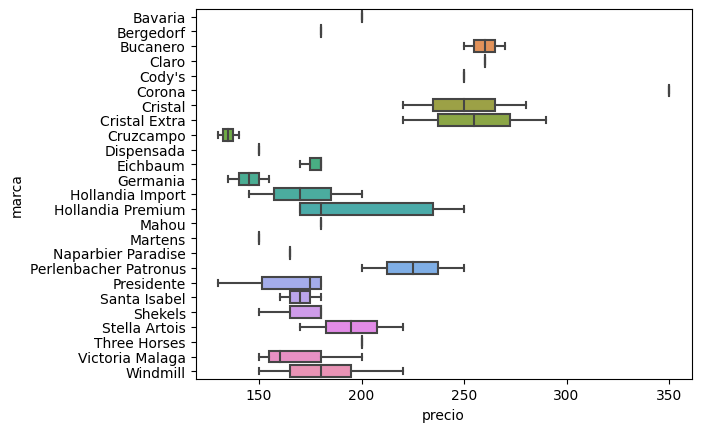

In [30]:
def calc_whisker(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    whisker_min = np.max([np.min(data), q1 - iqr])
    whisker_max = np.min([np.max(data), q3 + iqr])
    return whisker_min, whisker_max

# Agrupar el dataframe por la columna de marcas de cerveza y calcular el rango de precios para cada marca
df_grouped = df.groupby('marca')['precio'].apply(calc_whisker)

# Crear un nuevo dataframe con el rango de precios para cada marca y la marca correspondiente
df_whisker = df_grouped.to_frame().reset_index().rename(columns={'precio': 'whisker'})

# Crear una columna adicional en el dataframe original que indique la marca correspondiente a cada precio
df['marca_whisker'] = df['marca']

# Concatenar los dataframes original y de whiskers en uno solo
df_concat = pd.concat([df[['marca', 'precio']], df_whisker], ignore_index=True)

# Crear el boxplot usando la opción whisker y la columna marca_whisk# Crear el boxplot usando la opción whisker y la columna marca_whisker
sns.boxplot(data=df_concat.sort_values('marca'), x='precio', y='marca')





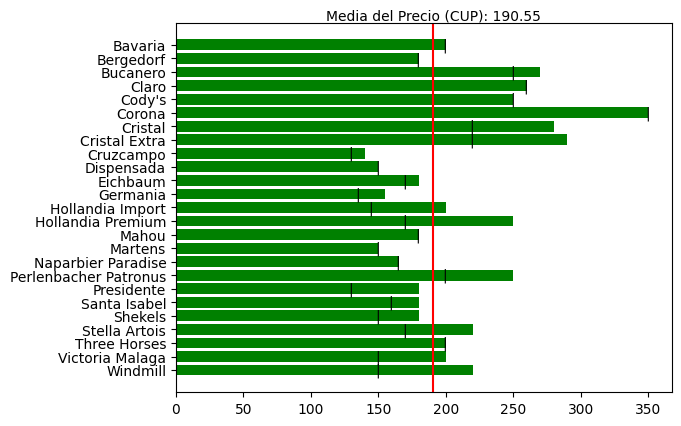

In [ ]:
df_grouped = df.groupby('marca')['precio'].max()

# Crear un nuevo dataframe con los precios máximos de cada marca y la marca correspondiente
df_max = df_grouped.to_frame().reset_index()

# Crear el gráfico de barras horizontal con los precios máximos
plt.barh(y=df_max['marca'], width=df_max['precio'], color = 'green')

# Agregar línea de la media
mean_price = df['precio'].mean()
plt.axvline(mean_price, color='red')

# Agregar marca con el precio mínimo dentro de la barra correspondiente
df_min = df.loc[df.groupby('marca')['precio'].idxmin()]
for i, row in df_min.iterrows():
    # Obtener la posición de la marca en el eje y
    pos = df_max[df_max['marca'] == row['marca']].index[0]
    # Agregar la marca con el precio mínimo en el punto correspondiente
    plt.text(x=row['precio'] - 2.5, y=pos, s='|', ha='left', va='center')
    
mean_price = df['precio'].mean()
y_pos = plt.ylim()[0] - 1 
plt.text(x=mean_price, y=y_pos, s=f'Media del Precio (CUP): {mean_price:.2f}', ha='center', va='top')

plt.gca().invert_yaxis()
    


Analizando la capacidad de compra del peso cubano por mililitro de cerveza, nos encontramos con que casi todas presentan costo por mililitro menor a un peso, excepto la Corona, que iguala esta cifra. La más barata en este aspecto resulta la cerveza dispensada, seguida de la Cruzcampo. Las cervezas nacionales siguen una tendencia similar al resto de marcas y se reparten su lugar en la zona más poblada del gráfico.

C:\Users\DJSix\AppData\Local\Temp\ipykernel_15252\483501941.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(precio_capacidad, precio_medio, s=precio_capacidad*1000, alpha=0.5, c=marca_color[marca], label=marca)


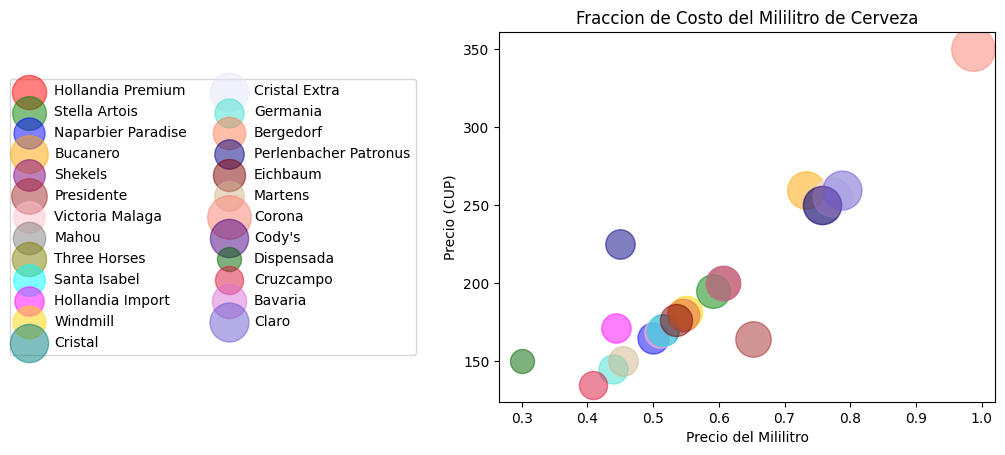

In [ ]:
from matplotlib.colors import ListedColormap

# Crear una lista de 25 colores diferentes
colores = ListedColormap(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'teal', 'lavender', 'turquoise', 'coral', 'navy', 'maroon', 'tan', 'salmon', 'indigo', 'darkgreen', 'crimson', 'orchid', 'slateblue'])

# Crear un diccionario que asigne un color a cada marca de cerveza
marca_color = {marca: colores(i) for i, marca in enumerate(df['marca'].unique())}

# Crear el gráfico de puntos
fig, ax = plt.subplots()
for marca in df['marca'].unique():
    subset = df[df['marca'] == marca]
    precio_medio = subset['precio'].mean()
    capacidad_media = subset['contenido'].mean()
    precio_capacidad = precio_medio / capacidad_media
    ax.scatter(precio_capacidad, precio_medio, s=precio_capacidad*1000, alpha=0.5, c=marca_color[marca], label=marca)

# Agregar etiquetas y título
ax.set_xlabel('Precio del Mililitro')
ax.set_ylabel('Precio (CUP)')
ax.set_title('Fraccion de Costo del Mililitro de Cerveza')

# Agregar la leyenda
ax.legend(loc='center left', bbox_to_anchor=(-1.0, 0.5), ncol=2)

# Mostrar el gráfico en la pantalla
plt.show()

Durante el análisis, también se consideró la cercanía de distintos establecimientos entre sí. Se tomó la hipótesis de que un grupo de establecimientos que estuvieran 
relativamente cerca tendrían precios similares respecto a las mismas marcas de cerveza.

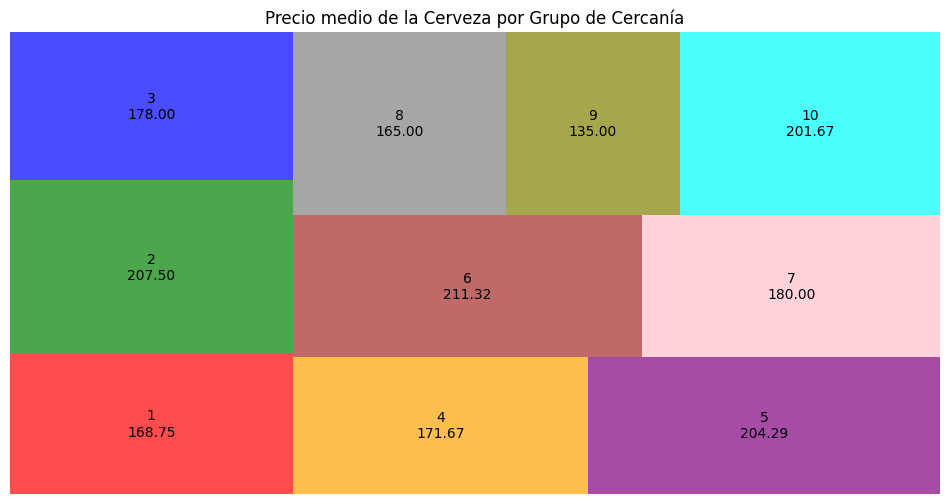

In [ ]:
grouped = df.groupby('grupo_de_cercania').agg({'precio': 'mean'}).reset_index()

# Obtener los tamaños de cada rectángulo según el precio medio del grupo de cercanía
sizes = grouped['precio'].to_list()

colores = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'teal', 'lavender', 'turquoise', 'coral', 'navy', 'maroon', 'tan', 'salmon', 'indigo', 'darkgreen', 'crimson', 'orchid', 'slateblue']
color = {k: v for k, v in zip(grouped.grupo_de_cercania.unique(), colores)}
# Crear el gráfico de treemap
label = [f"{grupo}\n{precio:.2f}" for grupo, precio in zip(grouped.grupo_de_cercania, grouped.precio)]


fig, ax = plt.subplots(figsize=(12, 6))
squarify.plot(sizes=sizes, color=[color[grupo] for grupo in grouped.grupo_de_cercania], label=label, alpha=0.7, ax=ax, pad=False)

# Agregar título al gráfico
plt.title("Precio medio de la Cerveza por Grupo de Cercanía")

# Ocultar los ejes del gráfico
plt.axis('off')

# Mostrar el gráfico
plt.show()

In [ ]:
# Agrupar los datos por marca y por grupo de cercanía, y calcular el precio medio de cada marca en cada grupo
grouped = df.groupby(['marca', 'grupo_de_cercania']).agg({'precio': 'mean'}).reset_index()

# Crear un DataFrame con los resultados
df_pivot = grouped.pivot(index='marca', columns='grupo_de_cercania', values='precio')

# Ordenar las filas del DataFrame por el precio medio en el grupo de cercanía más bajo
df_pivot = df_pivot.sort_values(by=df_pivot.columns[0])
df_pivot = df_pivot.fillna('-')
df_pivot = df_pivot.sort_values('marca')

# Mostrar el DataFrame
x = pd.DataFrame(df_pivot)
x

grupo_de_cercania,1,2,3,4,5,6,7,8,9,10
marca,,,,,,,,,,
Bavaria,-,-,-,-,-,-,-,-,-,200.0
Bergedorf,-,-,-,-,-,180.0,-,-,-,-
Bucanero,-,250.0,-,-,-,270.0,-,-,-,-
Claro,-,-,-,-,-,-,-,-,-,260.0
Cody's,-,-,-,-,-,250.0,-,-,-,-
Corona,-,-,-,-,-,350.0,-,-,-,-
Cristal,-,-,-,-,250.0,250.0,-,-,-,-
Cristal Extra,-,-,-,-,220.0,-,-,-,-,290.0
Cruzcampo,-,-,-,-,-,-,-,-,135.0,-


Finalmente, fue posible comprobar que el precio de la cerveza resulta muy variable incluso en establecimientos cercanos entre sí, y que en general la cercanía entre dos establecimientos no garantiza que tengan precios similares para su producto.

In [ ]:
# Obtener los grupos de cercanía distintos
grupos_cercania_distintos = df['grupo_de_cercania'].unique()

# Iterar sobre los grupos de cercanía
for grupo_cercania in grupos_cercania_distintos:
    print(f"Grupo de Cercania {grupo_cercania}:")
    
    # Filtrar los datos para mostrar solo el grupo de cercanía deseado
    df_filtered = df.loc[df['grupo_de_cercania'] == grupo_cercania, ['marca', 'precio']].drop_duplicates()
    print()
    
    # Iterar sobre las marcas
    for marca in df_filtered['marca'].unique():
        # Filtrar los datos para mostrar solo la marca deseada
        df_marca = df_filtered.loc[df_filtered['marca'] == marca, ['precio']]
        precios = ', '.join(df_marca['precio'].unique().astype(str))
        print(f" {marca}: {precios}")
    
    print()

Grupo de Cercania 1:

 Hollandia Premium: 170
 Stella Artois: 170
 Naparbier Paradise: 165

Grupo de Cercania 2:

 Bucanero: 250
 Shekels: 150
 Presidente: 180
 Hollandia Premium: 250

Grupo de Cercania 3:

 Victoria Malaga: 180
 Hollandia Premium: 170
 Presidente: 180
 Mahou: 180

Grupo de Cercania 4:

 Three Horses: 200
 Santa Isabel: 180
 Victoria Malaga: 150
 Hollandia Import: 170
 Windmill: 180, 150

Grupo de Cercania 5:

 Windmill: 200, 190
 Victoria Malaga: 160
 Cristal: 280, 220
 Cristal Extra: 220

Grupo de Cercania 6:

 Santa Isabel: 160
 Germania: 155
 Windmill: 220, 180
 Stella Artois: 220
 Hollandia Premium: 230, 250
 Cristal: 250
 Bucanero: 270
 Victoria Malaga: 200
 Bergedorf: 180
 Perlenbacher Patronus: 250
 Eichbaum: 170, 180
 Presidente: 170
 Martens: 150
 Shekels: 180
 Corona: 350
 Cody's: 250

Grupo de Cercania 7:

 Presidente: 180
 Shekels: 180

Grupo de Cercania 8:

 Germania: 135
 Hollandia Import: 145, 200
 Presidente: 145
 Windmill: 150
 Perlenbacher Patronus: 

Según la Oficina Nacional de Estadística e Información, en el año 2022 el salario promedio en La Habana era de 4689,00 pesos. Tomando en cuenta el precio medio de la cerveza en Plaza de la Revolución, nos encontramos con que con el salario de un mes es posible adquirir una media de 24 cervezas. A continuación, una tabla muestra cuántas cervezas de cada marca se pueden adquirir con el salario mensual en La Habana.

In [ ]:
# Calcular la media del precio de cada marca de cerveza
precio_medio_por_marca = df.groupby('marca')['precio'].mean()

# Especificar el salario dado
salario = 4689

# Calcular la cantidad de cada cerveza que se puede comprar
cantidad_por_marca = salario / precio_medio_por_marca

# Crear una tabla con la marca, el precio medio y la cantidad que se puede comprar
tabla = pd.DataFrame({
    'marca': cantidad_por_marca.index,
    'precio_medio': precio_medio_por_marca.values.round(2),
    'cantidad': cantidad_por_marca.values.round(2)
})

# Ordenar la tabla por la cantidad de cerveza que se puede comprar
tabla = tabla.sort_values('marca')


# Mostrar la tabla en la pantalla
pd.DataFrame(tabla.loc[:, ['marca', 'precio_medio', 'cantidad']])

,marca,precio_medio,cantidad
0,Bavaria,200.00,23.44
1,Bergedorf,180.00,26.05
2,Bucanero,260.00,18.03
3,Claro,260.00,18.03
4,Cody's,250.00,18.76
5,Corona,350.00,13.40
6,Cristal,250.00,18.76
7,Cristal Extra,255.00,18.39
8,Cruzcampo,135.00,34.73
9,Dispensada,150.00,31.26


Respecto a los envases, la gama cromática de estos se divide en siete colores, entre los que predominan el blanco y el verde, que juntos constituyen el 82,8 por ciento del total de envases analizados. La lata de cerveza tradicionalmente ha sido blanca o verde por varias razones, entre ellas:

- Conservación de la temperatura: El color blanco y el verde claro reflejan la luz solar y reducen la absorción de calor. Esto ayuda a mantener la cerveza fría por más tiempo en un ambiente cálido.
- Marketing y branding: Los colores blanco y verde claro se asocian a menudo con la frescura, la pureza y la naturaleza, lo cual puede ser beneficioso para la imagen de la marca de cerveza.

Sin embargo, es posible encontrar marcas de colores diversos incluso en el escaso mercado nacional: la Cristal es presentada tradicionalmente en un envase verde, la Cristal Extra en uno blanco y la Bucanero en uno rojo. Esta diferenciación ha provocado que el cubano identifique fácilmente el producto y que se cree un símbolo de identidad nacional a partir de los colores que representan a las marcas autóctonas.

Text(0.5, 1.0, 'Porcentaje de Colores del Envase')

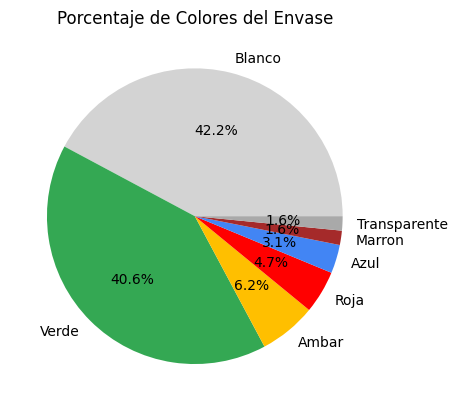

In [ ]:
colors_count = df['color_envase'].value_counts()
colors_dict = {
    'Verde': '#34A853',
    'Azul': '#4285F4',
    'Roja': '#EA4335',
    'Ambar': '#FFBF00',
    'Blanco': '#D3D3D3',
    'Transparente': '#A9A9A9',
    'Marron':'#A52A2A',
    'Roja':'#FF0000'
}

plt.pie(colors_count, labels=colors_count.index, autopct='%1.1f%%', colors=[colors_dict[color] for color in colors_count.index])

plt.title('Porcentaje de Colores del Envase')


Otro aspecto relevante es la capacidad de dichos envases. La forma de almacenamiento que más abunda es la lata, seguida de la botella, y hubo un único establecimiento que servía cerveza dispensada. La capacidad más común de los envases era de 330 ml, tanto para las bebidas nacionales como extranjeras. En general, el color o la presentación del envase no es posible afirmar que sean motivos de peso sobre el precio o la disponibilidad del producto en el contexto económico-social actual, a pesar de que dos colores dominan este apartado. Esto se debe a que los importadores de cerveza no toman en cuenta las estrategias de marketing detrás de la elección de color del envase para garantizar una mayor venta, porque el peso de dicho apartado sobre la venta es mínimo.

Respecto a la cantidad, en general es posible afirmar que un mayor envase implica un mayor precio del producto, excepto en el caso de la cerveza dispensada que por 200,00 pesos proporcionaba 500 ml del producto, convirtiéndola en la opción de mejor relación cantidad-precio disponible. La cerveza embotellada es también más cara que su contraparte enlatada.

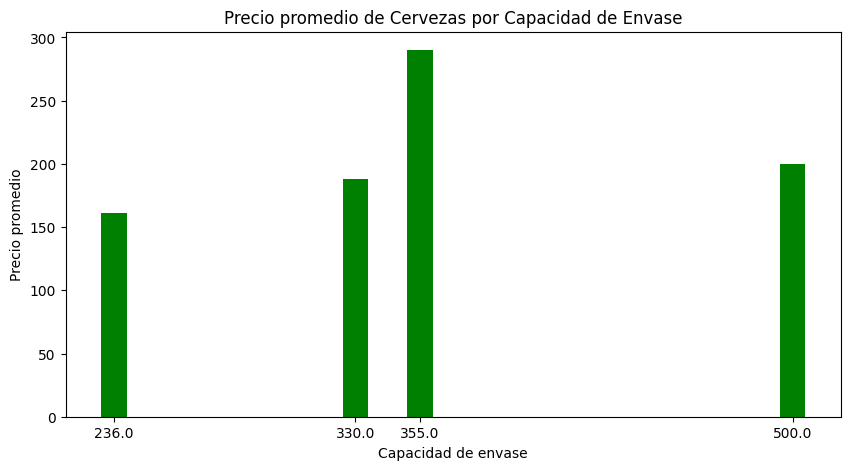

In [ ]:
precio_promedio = df.groupby('contenido')['precio'].mean()

# Crear el gráfico de barras
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(precio_promedio.index, precio_promedio.values, align='center', width=10.0, color = 'green')

# Agregar etiquetas y título
ax.set_xlabel('Capacidad de envase')
ax.set_ylabel('Precio promedio')
ax.set_title('Precio promedio de Cervezas por Capacidad de Envase')

# Establecer las etiquetas del eje x debajo de las barras
ax.set_xticks(precio_promedio.index)
ax.set_xticklabels([str(round(p, 2)) for p in precio_promedio.index])

# Mostrar el gráfico en la pantalla
plt.show()

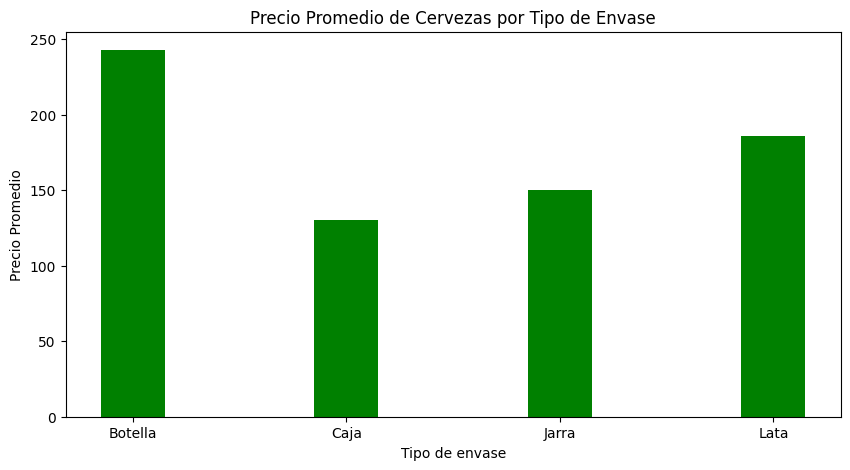

In [ ]:
coste_promedio = df.groupby('envase')['precio'].mean()

# Crear el gráfico de barras
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(coste_promedio.index, coste_promedio.values, align='center', width=0.3, color = 'green')

# Agregar etiquetas y título
ax.set_xlabel('Tipo de envase')
ax.set_ylabel('Precio Promedio')
ax.set_title('Precio Promedio de Cervezas por Tipo de Envase')

# Establecer las etiquetas del eje x debajo de las barras
ax.set_xticks(coste_promedio.index)

# Mostrar el gráfico en la pantalla
plt.show()

#### ¿De que Paises es Originaria la Cerveza Disponible en el Municipio?


El país de origen más común para las cervezas resultó Países Bajos, con cinco marcas presentes en los distintos establecimientos, lo que representa el 20 por ciento del total de marcas. Le siguen España con 4 y Alemania, Bélgica y Cuba con 3 representantes cada uno. El origen de la cerveza viene marcado por factores como: el costo del producto en el país desde el cual se importa, el costo de los envíos y los contenedores, la popularidad de la marca en la isla y la facilidad que brinde el país desde el cual se importa para realizar la operación.

(0.0, 100.0, 0.0, 100.0)

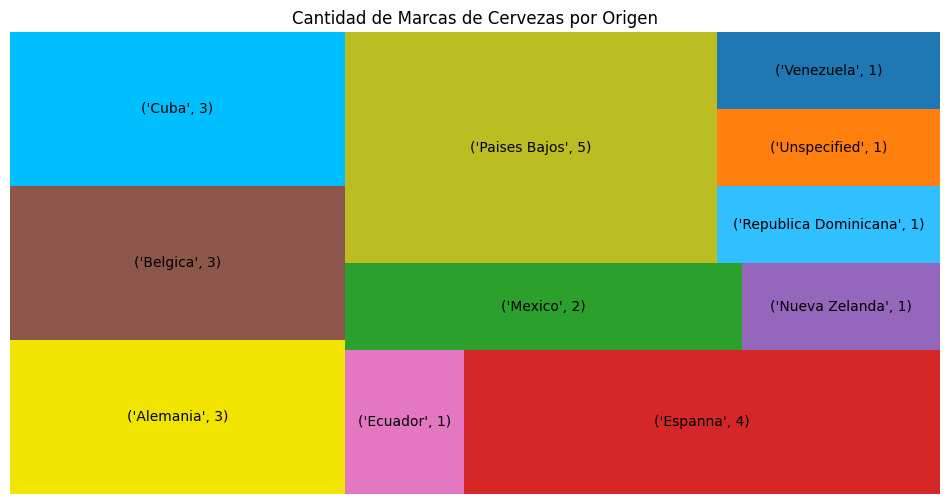

In [ ]:
origen_counts = df.groupby("pais").size().reset_index(name = 'cant')

counts = df.groupby('pais')['marca'].nunique()
sizes = counts.to_list()

color = colores_paises = {
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#af7f7f',
    '#bcbd22',
    '#27becf',
    '#f0e400',
    '#00bfff',
    '#30bfff'
}
label = list(zip(origen_counts.pais, sizes))

plt.figure(figsize=(12,6))
squarify.plot(sizes=sizes, color=color,label=label,pad=False)

plt.title("Cantidad de Marcas de Cervezas por Origen")
plt.axis('off')

En general, el precio medio de la cerveza cubana es el más alto, junto a la de Nueva Zelanda. Sin embargo, la bebida originaria del país asiático únicamente contaba con un representante entre todas las marcas, como se observó en el Treemap. Resulta interesante que España, con cuatro marcas diferentes, tenga un costo medio de la bebida inferior a la media en el municipio. Esto podría deberse a un menor costo de importación o más facilidades para completar dicho proceso respecto a otros países.

Text(0.5, 1.0, 'Precio Medio de la Cerveza por País de Origen')

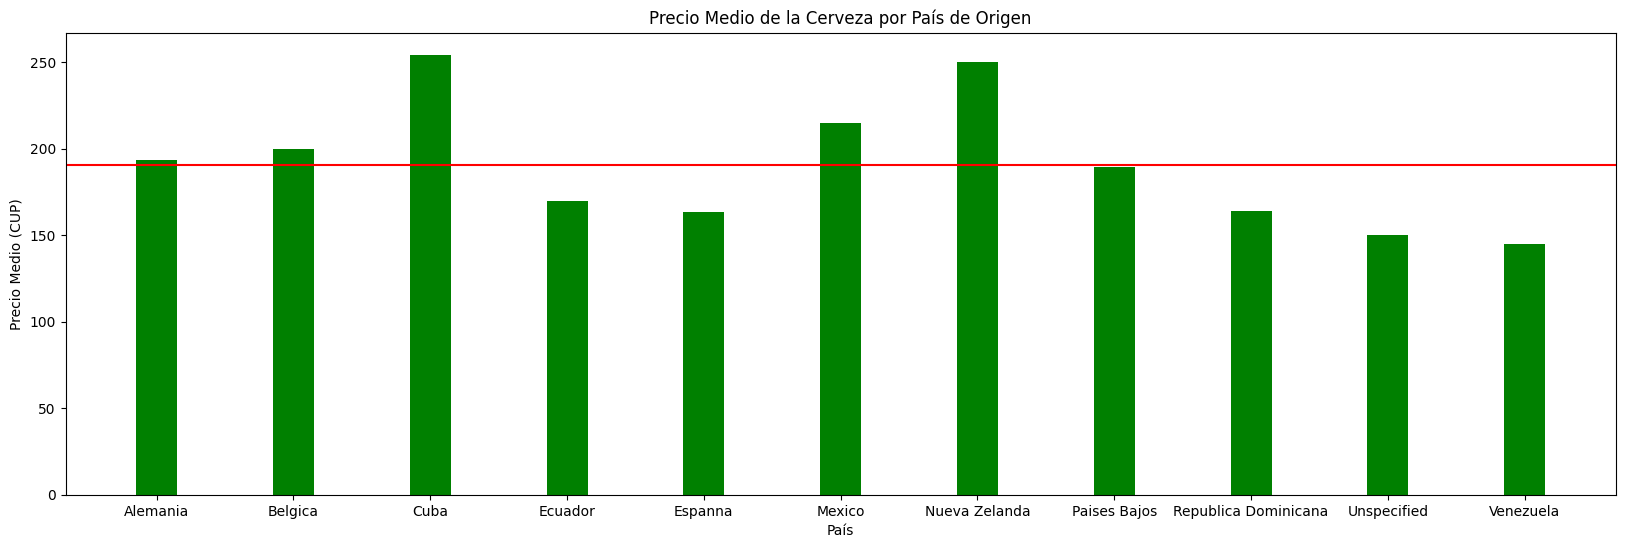

In [ ]:
precio_medio = df.groupby('pais')['precio'].mean()
precio_medio_general = df['precio'].mean()

# Crear el gráfico de barras utilizando la función bar() de matplotlib

plt.figure(figsize=(20, 6))
plt.bar(precio_medio.index, precio_medio.values, width=0.3, color='green')

plt.axhline(y=precio_medio_general, color='red', linestyle='-', label='Media de precio general')
# Añadir etiquetas y título al gráfico
plt.xlabel('País')
plt.ylabel('Precio Medio (CUP)')
plt.title('Precio Medio de la Cerveza por País de Origen')

# Analizando la Pizza


<hr> 

Aunque muchos ubican el origen de la pizza en Cuba en los años 60, lo cierto es que ya desde el XIX en la Isla comienza a conocerse la cocina italiana, especialmente entre los de la burguesía criolla, según Ciro Bianchi. Apunta el propio Bianchi que entre los años 40 y 50 se deja ver algún que otro restaurante de comida italiana que ofrecían en su carta la afamada pizza, entre ellos, el célebre Frascati, en Neptuno y Prado; Doña Rosina o Montecatini en el Vedado. Pero indudablemente, fue en los 60 cuando las pizzas cubanizadas alcanzaron su verdadera popularidad; unos dicen que por influencia de la moda italiana de aquella época, otros afirman que se hicieron famosas porque eran un alimento barato y rápido en ese entonces. A partir de los años 60 esto se convirtió en un fenómeno y empezaron a surgir pizzerías por doquier en cualquier rincón de la capital cubana.

Lo cierto es que hoy en día la rapidez con la que es posible obtener el alimento y su precio relativamente barato respecto a otros platos han hecho de la pizza una instancia de comida rápida extremadamente popular. Precisamente son las características físicas de dicho producto las que logranese cometido: son pizzas de tamaño mediano que pueden ser tomadas con una sola mano y una masa suave que permite doblarla a la mitad sin romperla y comerla mientras se camina o se está de pie sin sentir especial incomodidad. También se caracteriza por la utilización de queso Mozzarella, Blanco o Gouda; aunque las condiciones económicas del productor y la disponibilidad de materias primas son las que históricamente han condicionado los ingredientes utilizados en la elaboración.

La pizza base analizada fue la Napolitana, únicamente de queso y generalmente la versión más barata en un establecimiento determinado. Cuando se mencione pizza de forma genérica se referirá a este tipo en particular. Esta pizza generalmente es anunciada precisamente como "pizza", y los agregos se suelen colocar aparte con sus precios particulares. En algunos establecimientos, sin embargo, existen lo que se denominó "Tipos Especiales". Esa característica engloba a los productos con un nombre que no son reflejo de los agregos que tiene a menos que así lo especifique el establecimiento. Por ejemplo: Si se tiene una "Pizza Rocío" y una "Pizza Rocío de Jamón", y el precio de la "Pizza Rocío de Jamón" es distinto al de la "Pizza Rocío"con agregado de jamón, entonces ambas contarán como dos tipos especiales distintos.

### Precios de la Pizza en Plaza de la Revolucion

El precio de la pizza en el municipio se ve marcado fuertemente por varios factores. Entre ellos, uno de los que más fuerza tiene es el tamaño. La pizza tiene generalmente una forma circular, en donde un mayor tamaño implica un mayor radio, pero no precisamente una mayor altura o una mayor consistencia. A la pizza genérica le fue otorgado un tamaño mediano. Esto permite definir si el producto que se está viendo es mayor, menor o tiene una forma distinta a la tradicional.

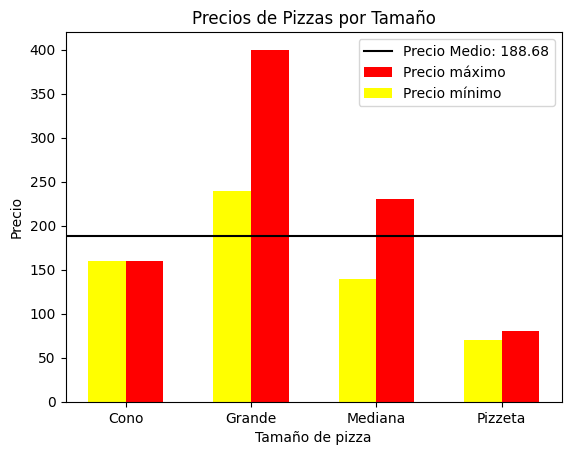

In [ ]:
df = pd.json_normalize(data, 'pizza')

precio_maximo_por_tamano = df.groupby('tamano')['precio'].max()
precio_minimo_por_tamano = df.groupby('tamano')['precio'].min()
precio_medio_por_tamano = df.groupby('tamano')['precio'].mean()

# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(precio_maximo_por_tamano.index, precio_maximo_por_tamano.values, width=0.3, align='edge', label='Precio máximo', color = 'red')
ax.bar(precio_minimo_por_tamano.index, precio_minimo_por_tamano.values, width=-0.3, align='edge', label='Precio mínimo', color ='yellow')
# Añadir línea de precio medio
mean = df["precio"].mean()
ax.axhline(df['precio'].mean(), color='black', linestyle='-', label=f'Precio Medio: {mean:.2f}')


# Añadir etiquetas y título
ax.set_xlabel('Tamaño de pizza')
ax.set_ylabel('Precio')
ax.set_title('Precios de Pizzas por Tamaño')
ax.legend()

# Mostrar el gráfico
plt.show()



Como se puede observar, el precio mínimo de una pizza grande es incluso mayor que el precio máximo de una pizza mediana. El precio medio de la pizza en Plaza de la Revolución es de 188,68 pesos cubanos. Esta media, sin embargo, no es característica del precio habitual de la pizza, pues existe una diferenciación muy grande entre los costos de las pizzas grandes y las medianas. Sin embargo, la pizza mediana es mucho más abundante que la grande y, por lo tanto, más fácil y común de encontrar en los distintos establecimientos.

In [ ]:
# Calcular la moda de los precios para cada tamaño
moda_por_tamano = df.groupby('tamano')['precio'].agg(pd.Series.mode)

# Calcular el precio medio y la frecuencia absoluta de los precios para cada tamaño
precio_medio_por_tamano = df.groupby('tamano')['precio'].mean()
frecuencia_absoluta_por_tamano = df.groupby('tamano')['precio'].count()

# Crear la tabla
tabla = pd.DataFrame({'Moda': moda_por_tamano, 'Precio Medio': precio_medio_por_tamano.round(2), 'Frecuencia Absoluta': frecuencia_absoluta_por_tamano})

# Imprimir la tabla
tabla

,Moda,Precio Medio,Frecuencia Absoluta
tamano,,,
Cono,160.0,160.00,1
Grande,"[240.0, 280.0]",305.56,9
Mediana,150.0,158.08,26
Pizzeta,"[70.0, 80.0]",75.00,2


### Zoom In a la Pizza Grande y Tipos Especiales

Como se muestra, la pizza grande tiene un precio máximo de 400,00 pesos y un precio mínimo de 260,00 pesos. Su precio medio es de 305,56 pesos, lo que lo sitúa por encima del precio medio de la pizza en general. Dentro de esta categoría de pizzas entran muchas de las consideradas de Tipos Especiales, pues su mayor tamaño permite construir una oferta más atractiva para el cliente a partir de asumir que ya gastará una cantidad mayor de dinero. Estos tipos especiales tienen un precio muy variado y generalmente son platos característicos del lugar donde son servidas. La pizza Hawaiana es la pizza de tipo especial más común, encontrándose en 6 de los establecimientos analizados, y la oferta más cara fue una Pizza Doble Queso, con un precio de mil cuatrocientos pesos cubanos en dos establecimientos diferentes.



In [ ]:
new_df = pd.DataFrame({'tipos_especiales': df['tipos_especiales'].explode(), 'precio_especiales': df['precio_especiales'].explode()})

# Utilizar el método groupby() para crear una tabla que muestre cada pizza solo una vez pero con todos sus precios correspondientes
frecuencia_absoluta_por_tamano = new_df.groupby('tipos_especiales')['precio_especiales'].count()
tabla = new_df.groupby('tipos_especiales')['precio_especiales'].apply(list).reset_index(name='precio_especiales')
tabla_merged = pd.merge(tabla,frecuencia_absoluta_por_tamano,on='tipos_especiales',how='outer')
tabla_merged


,tipos_especiales,precio_especiales_x,precio_especiales_y
0,Doble Queso,[1400],1
1,Especial,"[230, 400]",2
2,Especial de Queso,"[400, 320]",2
3,Especial de Queso Gouda,[400],1
4,Hawaiiana,"[360, 400, 520, 280, 270, 260]",6
5,Mixta,[300],1
6,Pizza Extrafina de Queso Gouda,[300],1
7,Pizza Rocio,[1000],1
8,Pizza Tradicional,[190],1
9,Pizza Tradicional con Queso Gouda,[230],1


Del total de ubicaciones analizadas, el 34.6 por ciento contaba con ofertas de pizzas especiales, lo que demuestra una capacidad moderada de los establecimientos para tener esta característica única sobre los demás.

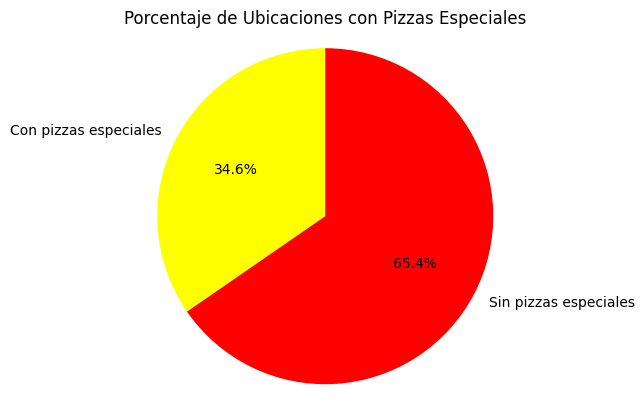

In [ ]:
ubicaciones_unicas = df.drop_duplicates(subset='ubicacion')

# Luego, contamos el número de ubicaciones únicas donde hay pizzas especiales
num_ubicaciones = ubicaciones_unicas['tipos_especiales'][ubicaciones_unicas['tipos_especiales'].apply(lambda x: isinstance(x, list) and len(x) > 0)].count()

porcentaje_pizzas_especiales = num_ubicaciones * 100 / len(ubicaciones_unicas)

# Creamos el gráfico de pastel
fig, ax = plt.subplots()
ax.pie([porcentaje_pizzas_especiales, 100 - porcentaje_pizzas_especiales], labels=['Con pizzas especiales', 'Sin pizzas especiales'], autopct='%1.1f%%', startangle=90, colors=['yellow','red'])
ax.axis('equal')
plt.title('Porcentaje de Ubicaciones con Pizzas Especiales')
plt.show()

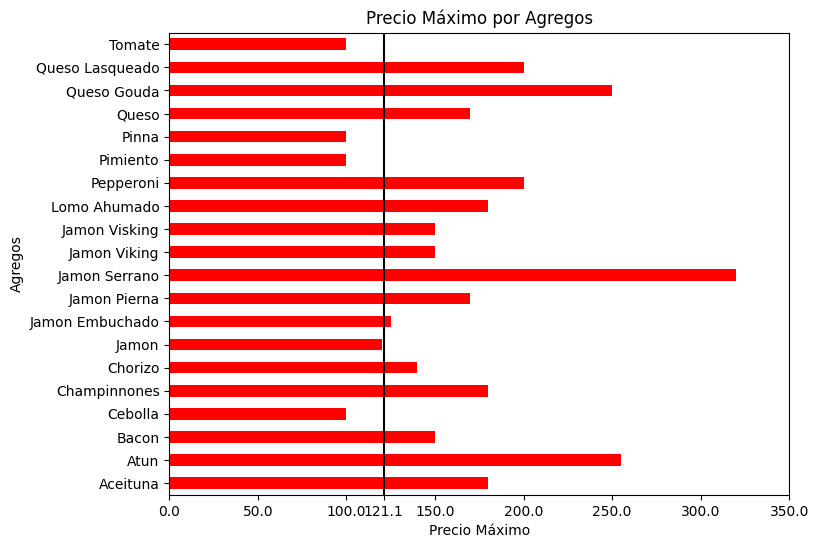

In [ ]:
agregos_precios_df = df[['agregos', 'precio_de_agregos','tamano']]

new_dfa = agregos_precios_df[agregos_precios_df['agregos'].apply(lambda x: len(x) > 0)]

new_dfa_grande = new_dfa.loc[new_dfa['tamano'] == 'Grande']

lista_agregos = []

for index, row in new_dfa_grande.iterrows():
    for agregado in row['agregos']:
        lista_agregos.append(agregado)
            
            
lista_precios = []

for index, row in new_dfa_grande.iterrows():
    for agregado in row['precio_de_agregos']:
        lista_precios.append(agregado)
            
daf = pd.DataFrame({'agregos': lista_agregos, 'precio_de_agregos': lista_precios})

precio_maximo = daf.groupby('agregos')['precio_de_agregos'].max()

# Obtener el precio medio para todos los agregados
precio_medio = daf['precio_de_agregos'].mean()
precio_medio = round(precio_medio,1)

# Crear un gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(8,6))
precio_maximo.plot(kind='barh', ax=ax, color = 'red')

# Agregar una línea negra para el precio medio
ax.axvline(precio_medio, color='black', linestyle='-')

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Precio Máximo')
ax.set_ylabel('Agregos')
ax.set_title('Precio Máximo por Agregos')
ax.set_xticks(list(ax.get_xticks()) + [precio_medio])
ax.set_xticklabels(list(map(str, list(ax.get_xticks())[:-1])) + [precio_medio])

# Mostrar el gráfico
plt.show()
moda_cebolla = daf[daf['agregos'] == 'Cebolla']['precio_de_agregos'].mode()[0]

Como se observa, el agrego más caro resulta el Jamón Serrano, y el precio medio para los agregos de las pizzas de tamaño grande es de 121,1 pesos. Los agregos más baratos coinciden con productos de producción agrícola nacional: la cebolla, el pimiento, la piña y el tomate. La disponibilidad de estos productos y la facilidad de adquisición respecto a los productos importados los hacen una constante en casi todos los establecimientos. El precio medio de la pizza grande en Plaza de la Revolución es de 305,56 pesos y no hay una moda en los precios. En general, la pizza grande constituye un producto presente en una menor proporción en los establecimientos analizados.

### Zoom In a la Pizza Mediana

La pizza mediana es el tipo más común en los establecimientos no estatales de venta minorista que producen este producto. Cuando se piensa en la pizza cubana, esta es la que engloba las características más esenciales. Este tipo de pizza tiene un precio promedio de 158,08 pesos y está presente en la amplia mayoría de los establecimientos que se analizaron.

Para la pizza mediana, el precio medio de un agregado es de 77,6 pesos, pero es notable cómo el precio máximo de cada agregado está por encima de la media. Este fenómeno encuentra una explicación en la moda de los distintos precios de los agregados que había disponibles. La moda de los precios de la pizza mediana es de 150,00 pesos.

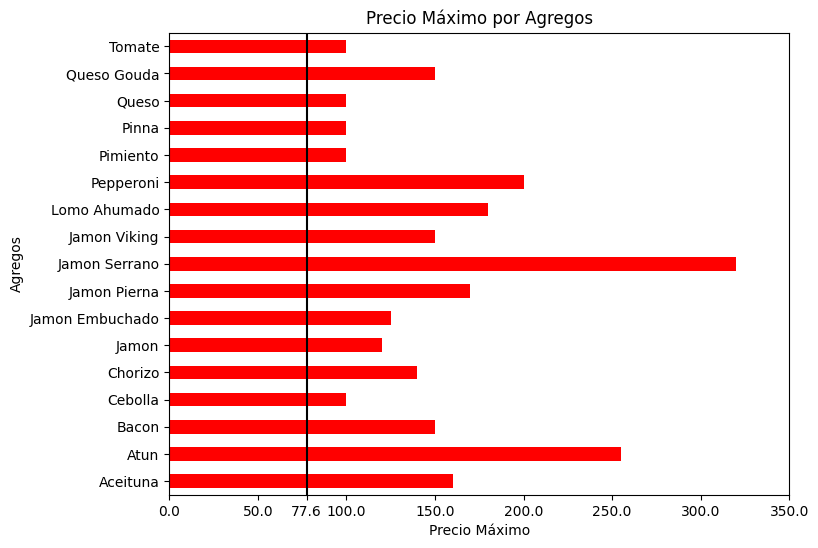

In [ ]:
agregos_precios_df = df[['agregos', 'precio_de_agregos','tamano']]

new_dfa = agregos_precios_df[agregos_precios_df['agregos'].apply(lambda x: len(x) > 0)]

new_dfa_grande = new_dfa.loc[new_dfa['tamano'] == 'Mediana']

lista_agregos = []

for index, row in new_dfa_grande.iterrows():
    for agregado in row['agregos']:
        lista_agregos.append(agregado)
            
            
lista_precios = []

for index, row in new_dfa_grande.iterrows():
    for agregado in row['precio_de_agregos']:
        lista_precios.append(agregado)
            
daef = pd.DataFrame({'agregos': lista_agregos, 'precio_de_agregos': lista_precios})

precio_maximo = daef.groupby('agregos')['precio_de_agregos'].max()

# Obtener el precio medio para todos los agregados
precio_medio = daef['precio_de_agregos'].mean()
precio_medio = round(precio_medio,1)

# Crear un gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(8,6))
precio_maximo.plot(kind='barh', ax=ax, color = 'red')

# Agregar una línea negra para el precio medio
ax.axvline(precio_medio, color='black', linestyle='-')

# Agregar etiquetas y título al gráfico
ax.set_xlabel('Precio Máximo')
ax.set_ylabel('Agregos')
ax.set_title('Precio Máximo por Agregos')
ax.set_xticks(list(ax.get_xticks()) + [precio_medio])
ax.set_xticklabels(list(map(str, list(ax.get_xticks())[:-1])) + [precio_medio])

# Mostrar el gráfico
plt.show()

moda_cebolla = daef[daef['agregos'] == 'Cebolla']['precio_de_agregos'].mode()[0]


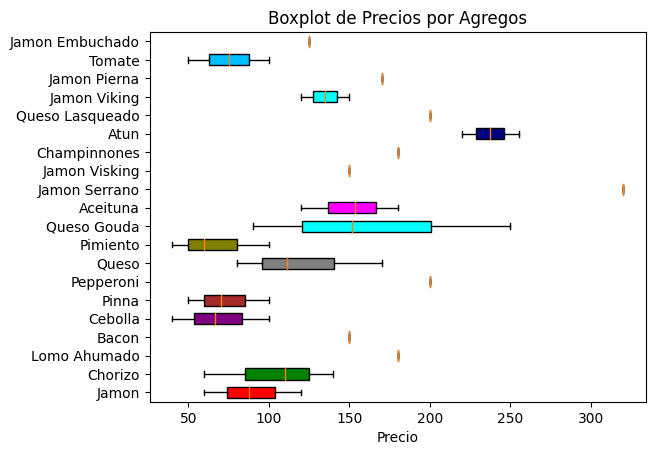

In [ ]:
colores = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray',
           'olive', 'cyan', 'magenta', 'yellow', 'lime', 'teal', 'navy', 'maroon', 'aqua', "springgreen", 'deepskyblue', 'gold', 'orangered']

# Agrupar los datos por agregado y calcular las estadísticas descriptivas
df_stats = daf.groupby('agregos')['precio_de_agregos'].describe()[['min', 'mean', 'max']]

# Crear un boxplot para cada agregado
posiciones = np.arange(len(daf['agregos'].unique()))
for i, agregado in enumerate(daf['agregos'].unique()):
    precios = df_stats.loc[agregado].values
    bp = plt.boxplot(precios, positions=[posiciones[i]], widths=0.6, showfliers=False,
                     patch_artist=True, vert=False)
    bp['boxes'][0].set_facecolor(colores[i])

# Configurar el eje y para mostrar los nombres de los agregados
plt.yticks(posiciones, daf['agregos'].unique())

# Agregar etiquetas al eje x al título del gráfico
plt.xlabel('Precio')
plt.title('Boxplot de Precios por Agregos')

# Mostrar el gráfico en la pantalla
plt.show()


### Pizza Mediana y Grande

A partir de los datos procesados sobre las pizzas medianas y grandes, se puede establecer la siguiente relación sobre la presencia de agregados en cada uno de los tipos de pizza y al mismo tiempo hacer una comparación sobre sus respectivos precios. El gráfico se refiere al precio máximo en cada tipo de pizza, siendo el color rojo el precio máximo del agregado en la pizza grande y el morado en la pizza mediana. El azul indica el valor máximo en el que alcanzan el mismo precio, si es que lo alcanzan.

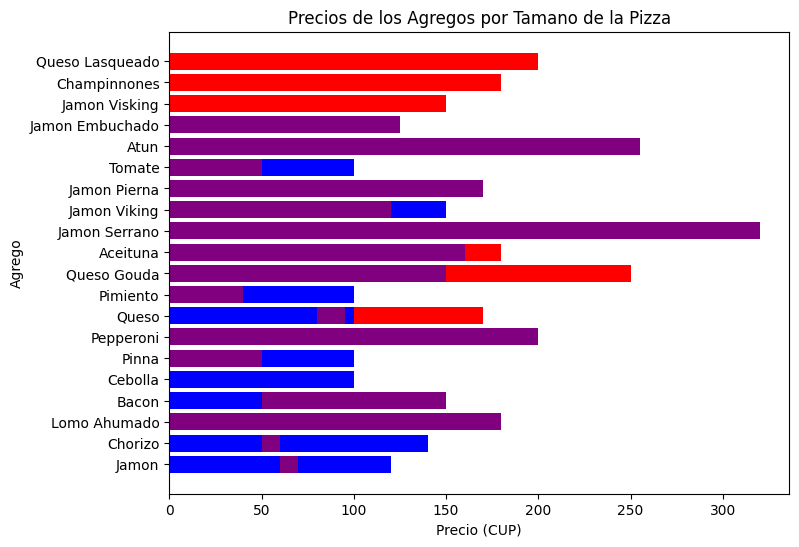

In [ ]:
merged_dataframe = pd.merge(daef, daf, on='agregos', how='outer')

merged_dataframe['precio_max'] = merged_dataframe[['precio_de_agregos_x', 'precio_de_agregos_y']].max(axis=1)
merged_dataframe['precios_iguales'] = merged_dataframe['precio_de_agregos_x'] == merged_dataframe['precio_de_agregos_y']

# crea el gráfico de barras apiladas
fig, ax = plt.subplots()

# crea las barras para el precio máximo
max_bar = ax.barh(merged_dataframe['agregos'], merged_dataframe['precio_max'], color='red')

# crea las barras para el otro precio, de color azul para precios distintos y de color morado para precios iguales
other_bar_colors = ['blue' if not p else 'purple' for p in merged_dataframe['precios_iguales']]
other_bar = ax.barh(merged_dataframe['agregos'], merged_dataframe['precio_de_agregos_x'], color=other_bar_colors)

# ajusta el tamaño de la figura
fig.set_size_inches(8, 6)

# agrega etiquetas de eje y título
ax.set_xlabel('Precio (CUP)')
ax.set_ylabel('Agrego')
ax.set_title('Precios de los Agregos por Tamano de la Pizza')


# muestra el gráfico
plt.show()



Sobre el precio de la pizza, también se manejó la hipótesis de que el costo del producto en ubicaciones cercanas a puntos de interés, como escuelas u hospitales, podría incrementarse respecto a las ubicaciones que no tienen un punto de interés cercano.

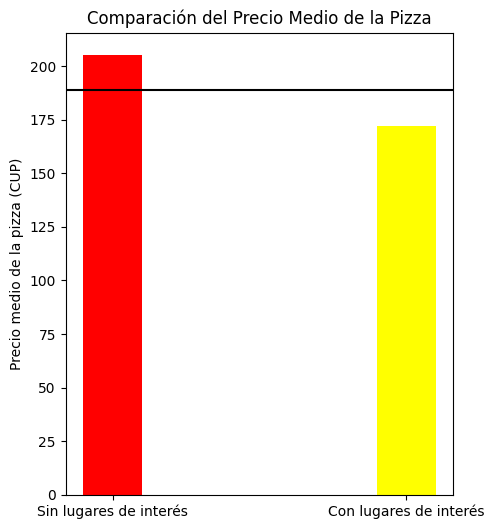

In [ ]:
con_lugares = df[df['lugares_de_interes'].apply(len) > 0]
sin_lugares = df[df['lugares_de_interes'].apply(len) == 0]

precio_medio_con_lugares = con_lugares['precio'].mean()
precio_medio_sin_lugares = sin_lugares['precio'].mean()


fig, ax = plt.subplots()

# crea las barras para el precio medio de la pizza
ax.bar([0, 1], [precio_medio_sin_lugares, precio_medio_con_lugares], color=['red', 'yellow'], width=0.2)

# ajusta el tamaño de la figura
fig.set_size_inches(5, 6)

# agrega etiquetas de eje y título
mean = df["precio"].mean()
ax.axhline(df['precio'].mean(), color='black', linestyle='-', label=f'Precio Medio: {mean:.2f}')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Sin lugares de interés', 'Con lugares de interés'])
ax.set_ylabel('Precio medio de la pizza (CUP)')
ax.set_title('Comparación del Precio Medio de la Pizza')

# muestra el gráfico
plt.show()

Sin embargo, los datos muestran que los precios en establecimientos con lugares de interés cercanos no solo son menores en general que los que no tienen, sino que además el precio es menor a la media del costo medio de la pizza en el municipio. Esto podría deberse a que dentro de una zona cercana a un lugar de interés suele haber más establecimientos cercanos entre sí, lo que podría provocar un aumento de la competencia y, a su vez, llevar a precios más competitivos entre los puntos de venta dentro de un mismo grupo de cercanía.

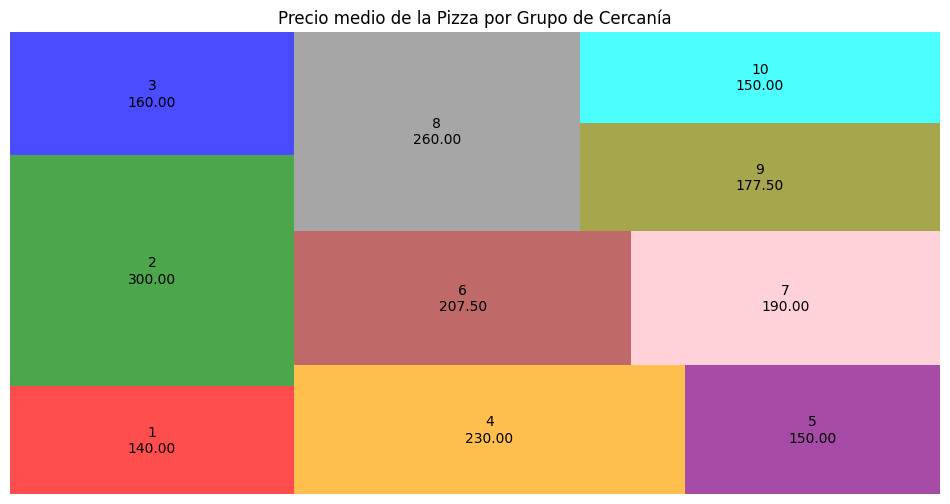

In [ ]:
grouped = df.groupby('grupo_de_cercania').agg({'precio': 'mean'}).reset_index()

# Obtener los tamaños de cada rectángulo según el precio medio del grupo de cercanía
sizes = grouped['precio'].to_list()

colores = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'gold', 'teal', 'lavender', 'turquoise', 'coral', 'navy', 'maroon', 'tan', 'salmon', 'indigo', 'darkgreen', 'crimson', 'orchid', 'slateblue']
color = {k: v for k, v in zip(grouped.grupo_de_cercania.unique(), colores)}
# Crear el gráfico de treemap
label = [f"{grupo}\n{precio:.2f}" for grupo, precio in zip(grouped.grupo_de_cercania, grouped.precio)]


fig, ax = plt.subplots(figsize=(12, 6))
squarify.plot(sizes=sizes, color=[color[grupo] for grupo in grouped.grupo_de_cercania], label=label, alpha=0.7, ax=ax, pad=False)

# Agregar título al gráfico
plt.title("Precio medio de la Pizza por Grupo de Cercanía")

# Ocultar los ejes del gráfico
plt.axis('off')

# Mostrar el gráfico
plt.show()

Precisamente, el grupo de cercanía 3 se encuentra en los alrededores de la Universidad de La Habana y el Hospital "Calixto García". Y el grupo de cercanía 6 contiene ubicaciones cercanas al Hospital "González Coro".

### Relacion Pizza - Cerveza - Salario

Con el Salario Mensual de La Habana de 4689,00 pesos, tomando como referencia la moda del precio de la cerveza y la moda del precio de las pizzas, es posible conformar el precio de lo que podría ser un almuerzo para una persona en puntos de venta donde se distribuyan estos productos. Nótese que se toma la moda porque es el precio más común en el que se pueden encontrar ambos productos. Así, la moda del precio de la pizza es de 150,00 pesos, y la de la cerveza es de 180,00 pesos, por lo que un almuerzo de una pizza y una cerveza es muy probable que cueste alrededor de 330,00 pesos. Esto implica que con el salario medio se pueden comprar 14 almuerzos si se utiliza completamente para ello.

Este número resulta pequeño al considerar el resto de necesidades básicas de una persona e incluso al considerar el alto costo que tienen algunas de las cervezas y pizzas que formaron parte del análisis, lo que evidencia la pobreza de la capacidad de compra del peso cubano en el contexto actual, donde ni el producto nacional es capaz de salvar la situación al verse dominado en cuanto a la competitividad de los precios por el producto importado.

# Analizando la Cebolla


<hr> 

La cebolla en Cuba se vende principalmente en agros o carretillas que recorren la ciudad y promocionan el producto, el tamaño, el tipo de cebolla e incluso, a veces, es posible escuchar el precio si se agudiza el oído hacia cualquier conversación entre el vendedor y cualquier curioso.

En general, la cebolla más abundante se divide en dos tipos: morada y blanca, aunque hay otros tipos que son menos comunes en los distintos establecimientos, como la Caribe.

In [ ]:
df = pd.json_normalize(data, 'cebolla')

medias_por_tipo = df.groupby('tipo')['precio'].mean().reset_index().round(2)
modas_por_tipo = df.groupby('tipo')['precio'].apply(lambda x: x.mode()[0]).reset_index()
medias_gen = df['precio'].mean().round(2)

tabla_medias_modas_por_tipo = medias_por_tipo.merge(modas_por_tipo, on='tipo')
tabla_medias_modas_por_tipo = tabla_medias_modas_por_tipo.rename(columns={'tipo': 'tipo de cebolla', 'media': 'precio medio', 'moda': 'precio moda'})

tabla_medias_modas_por_tipo


,tipo de cebolla,precio_x,precio_y
0,Blanco,187.65,170
1,Caribe,150.00,150
2,Morada,187.06,170


In [ ]:
print(f'El valor medio de la cebolla en Plaza es de {medias_gen} pesos')

El valor medio de la cebolla en Cuba es de 170.38 pesos


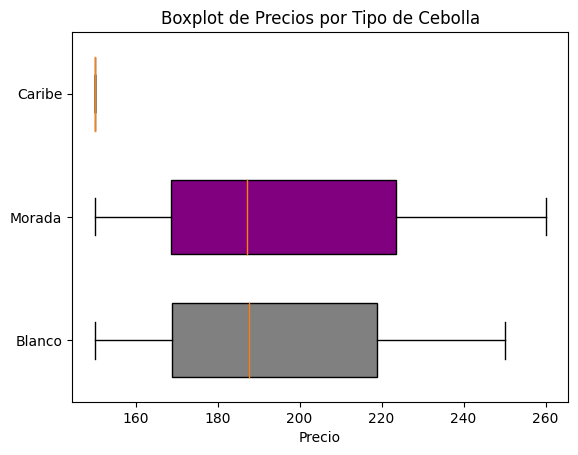

In [ ]:
colores = ['grey', 'purple', 'brown']

# Agrupar los datos por agregado y calcular las estadísticas descriptivas
df_stats = df.groupby('tipo')['precio'].describe()[['min', 'mean', 'max']]

# Crear un boxplot para cada agregado
posiciones = np.arange(len(df['tipo'].unique()))
for i, agregado in enumerate(df['tipo'].unique()):
    precios = df_stats.loc[agregado].values
    bp = plt.boxplot(precios, positions=[posiciones[i]], widths=0.6, showfliers=False,
                     patch_artist=True, vert=False)
    bp['boxes'][0].set_facecolor(colores[i])

# Configurar el eje y para mostrar los nombres de los agregados
plt.yticks(posiciones, df['tipo'].unique())

# Agregar etiquetas al eje x al título del gráfico
plt.xlabel('Precio')
plt.title('Boxplot de Precios por Tipo de Cebolla')

# Mostrar el gráfico en la pantalla
plt.show()

Como se puede observar, la cebolla blanca tiene un precio medio muy similar al de la morada, sin embargo, la cebolla morada tiene un precio máximo mayor, llegando a costar 260,00 pesos cubanos.

Si consideramos que a una pizza mediana se le agregan 150 gramos de cebolla, lo que equivale a 0,33 libras, entonces de una libra de cebolla se pueden completar 3 pizzas. La cebolla más común con la que se realiza la pizza es la blanca, cuyo precio modal es 170,00 pesos. Entonces, de una libra de cebolla, 56,6 pesos irían a cada una de las pizzas. Esto situaría el costo del agregado de cebolla por encima de la moda del agregado de cebolla para pizzas medianas, que es de 40, por lo que no resulta una suposición descabellada que los pizzeros puedan obtener la cebolla más barata que el público general o que conceban las pizzas con menos de 150 gramos de cebolla, lo cual resulta una cantidad irrisoria.

En cuanto al salario provincial y la cebolla, resulta que el precio medio de la cebolla en el municipio es de 170,38 pesos, por lo que con el salario de un mes sepodrían comprar 27 libras de cebolla. Esto es otra evidencia de la inflación y la pérdida de valor de la moneda nacional respecto incluso a productos propios.